In [1]:
import sys
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
import anndata
import anndata as ad
#from harmony import harmonize
#import utils
# import importlib
# importlib.reload(utils)

In [3]:
import anndata as ad

# Load the .h5ad file
adata = ad.read('tom_uce_adata.h5ad')

/home/cbb575_jc4457/.conda/envs/CellBender/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata.obs_names_make_unique

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 11558 × 15517
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'predicted_labels_colors', 'rank_genes_groups', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_uce', 'X_umap'
    obsp: 'connectivities', 'distances'>

In [9]:
adata.X

<11558x15517 sparse matrix of type '<class 'numpy.float32'>'
	with 39322813 stored elements in Compressed Sparse Row format>

In [4]:
for col in adata.obs.select_dtypes(['category']).columns:
    adata.obs[col] = adata.obs[col].astype(str)

In [8]:
#pip install leidenalg 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.9 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.neighbors(adata, use_rep='X_uce')
sc.tl.umap(adata)
sc.tl.leiden(adata)

In [6]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCACACAGTCCG-1    normal  T pos     1000                977   
AAACCCACACCCTTAC-1    normal  T pos      420                414   
AAACCCACACCTATCC-1    normal  T pos     1230               1206   
AAACCCACAGGCGTTC-1    normal  T pos      157                154   
AAACCCAGTGGCACTC-1    normal  T pos     1738               1703   
...                      ...    ...      ...                ...   
TTTGTTGCAGTAGGAC-1      nash  T pos     1365               1348   
TTTGTTGCATAGATCC-1      nash  T pos      942                919   
TTTGTTGGTTACTCAG-1      nash  T pos     3711               3629   
TTTGTTGTCAAAGCCT-1      nash  T pos     4689               4593   
TTTGTTGTCCGTTGAA-1      nash  T pos     5129               5026   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCACACAGTCCG-1                 6.885510        1680.0            7.427144   
AAACCCACACCCTTAC-1                 6.028279         993.0            6.901737   
AAACCCACACCTATCC-1                 7.095893        2292.0            7.737616   
AAACCCACAGGCGTTC-1                 5.043425         541.0            6.295266   
AAACCCAGTGGCACTC-1                 7.440734        3693.0            8.214465   
...                                     ...           ...                 ...   
TTTGTTGCAGTAGGAC-1                 7.207119        2420.0            7.791936   
TTTGTTGCATAGATCC-1                 6.824374        1344.0            7.204149   
TTTGTTGGTTACTCAG-1                 8.196988       11432.0            9.344259   
TTTGTTGTCAAAGCCT-1                 8.432506       17914.0            9.793394   
TTTGTTGTCCGTTGAA-1                 8.522579       19507.0            9.878580   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCACACAGTCCG-1                   23.869048                    34.166667   
AAACCCACACCCTTAC-1                   58.912387                    68.378651   
AAACCCACACCTATCC-1                   26.657941                    35.558464   
AAACCCACAGGCGTTC-1                   80.776340                    90.018484   
AAACCCAGTGGCACTC-1                   23.206066                    35.066342   
...                                        ...                          ...   
TTTGTTGCAGTAGGAC-1                   18.719008                    28.305785   
TTTGTTGCATAGATCC-1                   18.452381                    28.869048   
TTTGTTGGTTACTCAG-1                   15.115465                    23.819104   
TTTGTTGTCAAAGCCT-1                   13.252205                    20.855197   
TTTGTTGTCCGTTGAA-1                   13.220895                    20.428564   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCACACAGTCCG-1                    47.857143                    71.607143   
AAACCCACACCCTTAC-1                    78.449144                   100.000000   
AAACCCACACCTATCC-1                    47.643979                    69.197208   
AAACCCACAGGCGTTC-1                   100.000000                   100.000000   
AAACCCAGTGGCACTC-1                    46.953696                    65.475223   
...                                         ...                          ...   
TTTGTTGCAGTAGGAC-1                    42.148760                    64.958678   
TTTGTTGCATAGATCC-1                    43.750000                    68.824405   
TTTGTTGGTTACTCAG-1                    35.671798                    53.621414   
TTTGTTGTCAAAGCCT-1                    31.528414                    49.179413   
TTTGTTGTCCGTTGAA-1                    29.625263                    46.321833   

                   leiden  
AAACCCACACAGTCCG-1      5  
AAACCCACACCCTTAC-1      6  
AAACCCACACCTATCC-1      5  
AAACCCACAGGCGTTC-1      6  
AAACCCAGTGGCACTC-1      6  
...                   ...  
TTTGTTGCAGTAGGAC-1     10  
TTTGTTGCATAGATCC-1      1  
TTTGTTGGTTACTCAG-1      0  
TTTGTTGTCAAAGCCT-1      1  
TTTGTTGTCCGTTGAA-1     

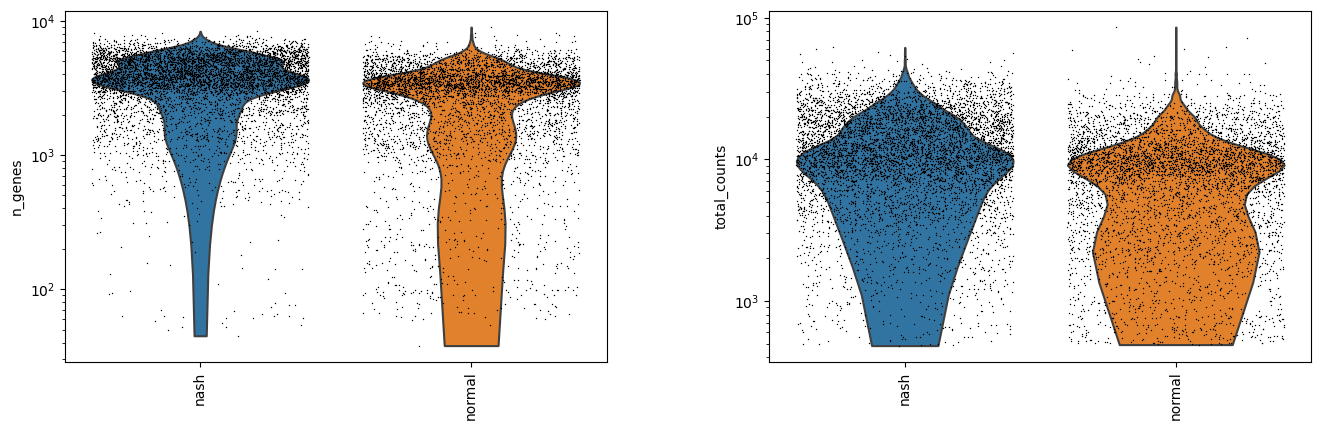

In [7]:
sc.pl.violin(adata, ['n_genes', 'total_counts'], rotation=90,
             groupby='treatment', jitter=0.4, multi_panel=True, log=True, cut=0)

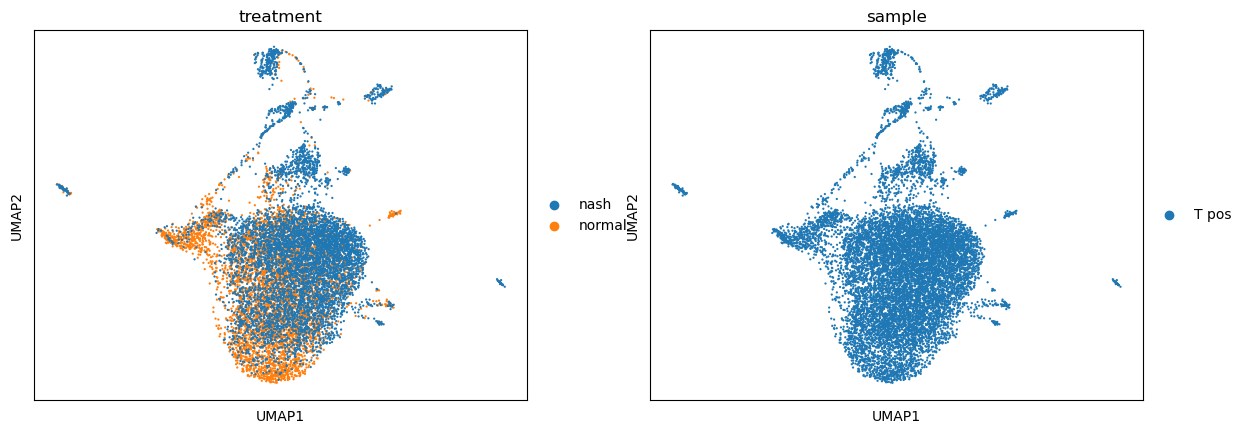

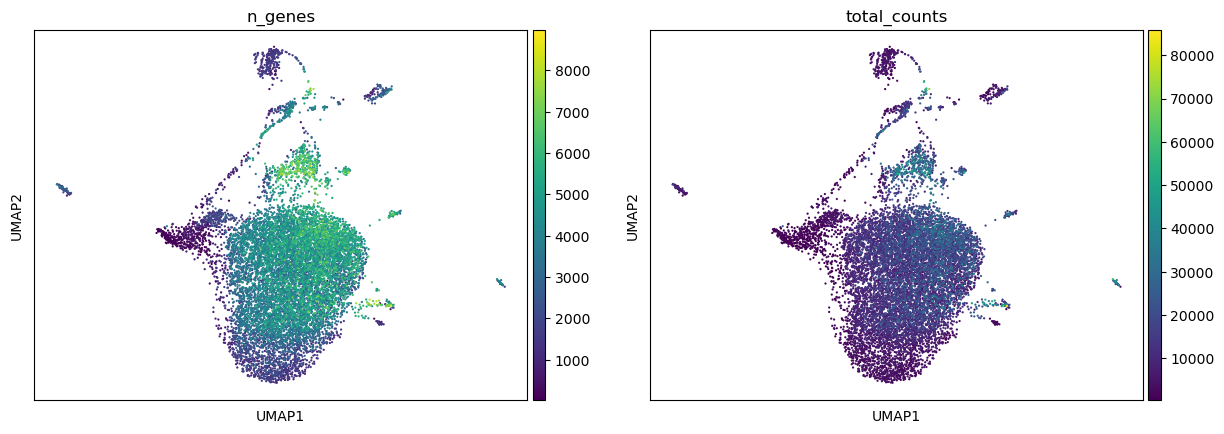

In [8]:
sc.pl.umap(adata, color=['treatment','sample'])
sc.pl.umap(adata, color=['n_genes','total_counts'], groups=['true'])
#sc.pl.umap(adata, color='ribo_bool', frameon=True, vmax='p90', groups=['true'])

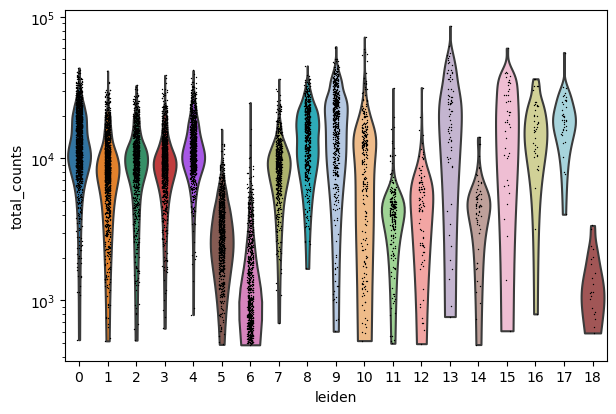

In [10]:
sc.pl.violin(adata, keys=['total_counts'], groupby='leiden', frameon=False, log=True)

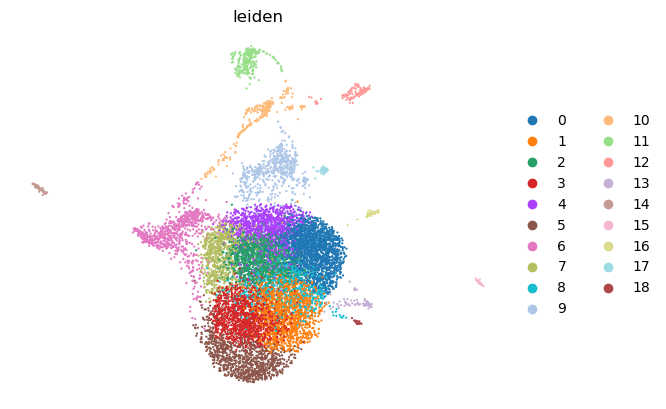

In [11]:
sc.pl.umap(adata, color='leiden', frameon=False)

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize counts
sc.pp.log1p(adata)  # Log-transform the data

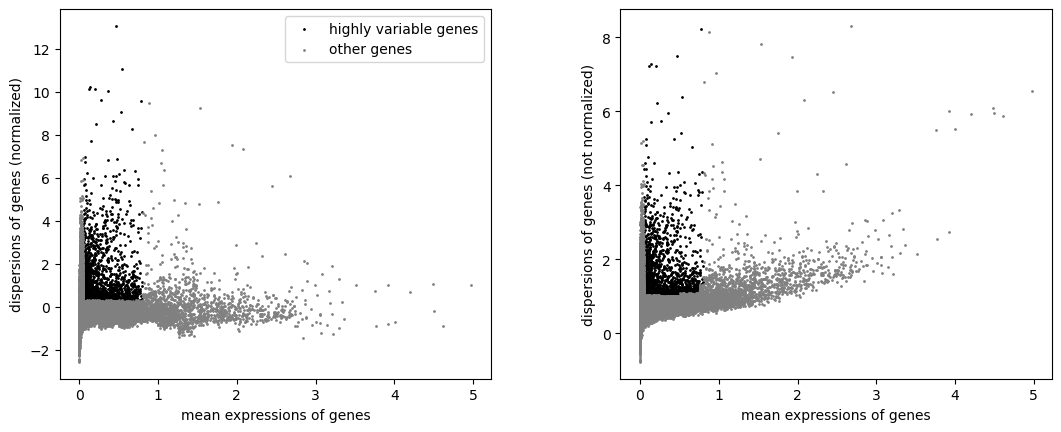

Found 1412 variables genes of 15517 total


In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=0.8, min_disp=0.3)
sc.pl.highly_variable_genes(adata, log=False)
print('Found %i variables genes of %i total' %(sum(adata.var['highly_variable']), adata.var.shape[0] ) )

In [19]:
sc.tl.rank_genes_groups(adata, "leiden", test='wilcoxon')

In [20]:
marker_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
marker_genes.head(10)

0        1         2        3         4        5        6         7  \
0   Iigp1    Prkg1   Selenop    Ptprb   Gpihbp1    Lrmda  mt-Cytb    Igfbp7   
1    Egr1    Prkch    Clec4g   Sema6a   Selenop     Psd3   mt-Nd2     Ptprb   
2  Rnf213     Psd3      Aqp1     Psd3    Gpr182    Stab2   mt-Nd4  Dnase1l3   
3  Cdkn1a      Jun  Dnase1l3   Rasal2   Serinc3   Rasal2  mt-Atp6   Selenop   
4     Ubc    Prkce   Serinc3    Meis2      Aqp1   mt-Co1   mt-Co3       Maf   
5     Fos   Zswim6    Gpr182    Stab2  Dnase1l3   Sema6a   mt-Co2      Aqp1   
6    Junb     Jak1     Plpp3       F8     Sparc    Macf1   mt-Nd1   Gpihbp1   
7  Cxcl10    Ptprb       Maf     Nrp1    Ifitm2  mt-Cytb   mt-Co1     Itm2b   
8  Ifi207   Rasal2    Igfbp7   Igfbp7     Plpp3   mt-Nd4   mt-Nd3    Clec4g   
9   Socs3  Rapgef5     Ptprb  Plekhg1     Ptprb   mt-Co3   mt-Nd5     Sparc   

          8       9      10       11        12        13        14       15  \
0     Iigp1  Tyrobp  Tyrobp     Srgn     Dock2       Dcn      Cd74   Jchain   
1      Egr1    Actb  Laptm5   S100a9  Arhgap15     Rbms3     H2-Aa     Cd74   
2    Rnf213  Tmsb4x    Ctss    Cebpb     Elmo1  Tmem176b      Ebf1   Sec11c   
3     Ptprb  Laptm5    Cd44   Clec4d    Dock10  Serping1    H2-Eb1  Herpud1   
4   Serinc3    Cd44    Actb    Cxcl2     Ptprc      Sox5  Arhgap15    Spcs2   
5      Flt1    Fth1  Lgals3     Cd44   Dennd4a      Fth1     Cd79a   Txndc5   
6     Prkg1  Fcer1g   Ptprc   Tyrobp    Akap13      Lhfp     Bank1     Mzb1   
7    Sptbn1    Lyz2    Cd52   S100a8     Celf2     Timp2      Ighm     Igkc   
8  Ppp1r15a    Ctss    Gpx1  Lilrb4a       Itk        C3    H2-Ab1    Cd79a   
9      Aqp1   Ptprc    Cyba    Sgms2     Runx1     Bicc1      Aff3   Inpp4b   

       16        17        18  
0   Top2a    Dock10     Itm2b  
1   Mki67     Ptprc       B2m  
2   Stmn1     Dock2    Gpr182  
3   Hmgb2     Skap1      Aqp1  
4   Kif11    Ptpn22      Tpt1  
5    Prc1     Mbnl1  Dnase1l3  
6  Nusap1  Arhgap15   Serinc3  
7    Smc4       Itk      Actb  
8   Tubb5     Rps10    Tmsb4x  
9   Cenpf     Rpl19   Selenop

In [14]:
marker_genes[['6']].head(10)

6
0   mt-Nd2
1   mt-Nd3
2  mt-Cytb
3   mt-Nd1
4   mt-Co3
5   mt-Co2
6   mt-Nd4
7   mt-Nd5
8  mt-Nd4l
9  mt-Atp6

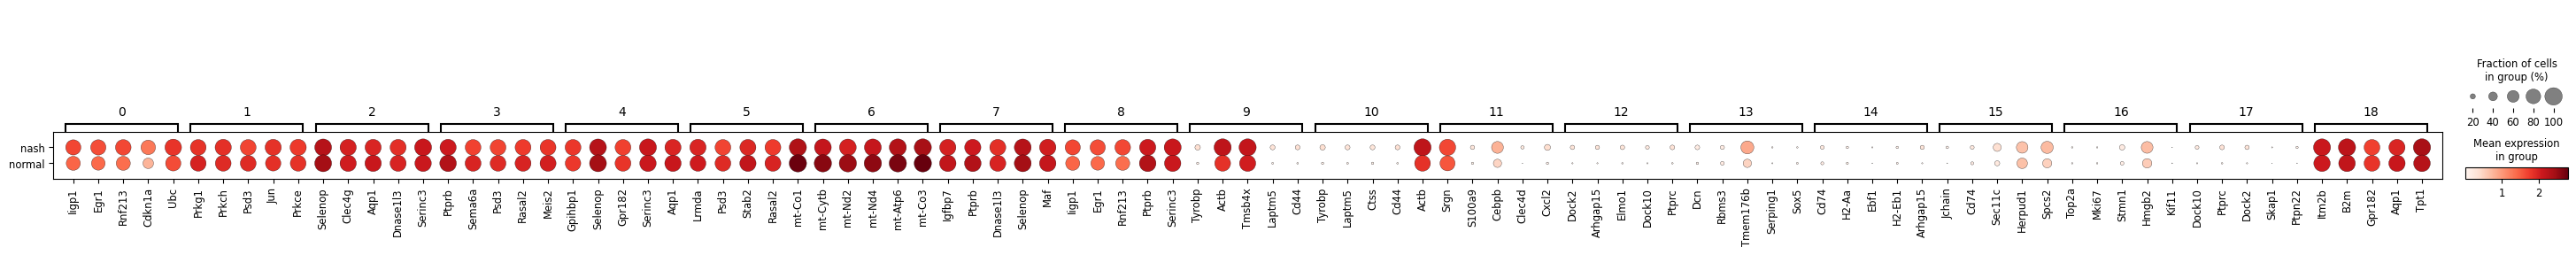

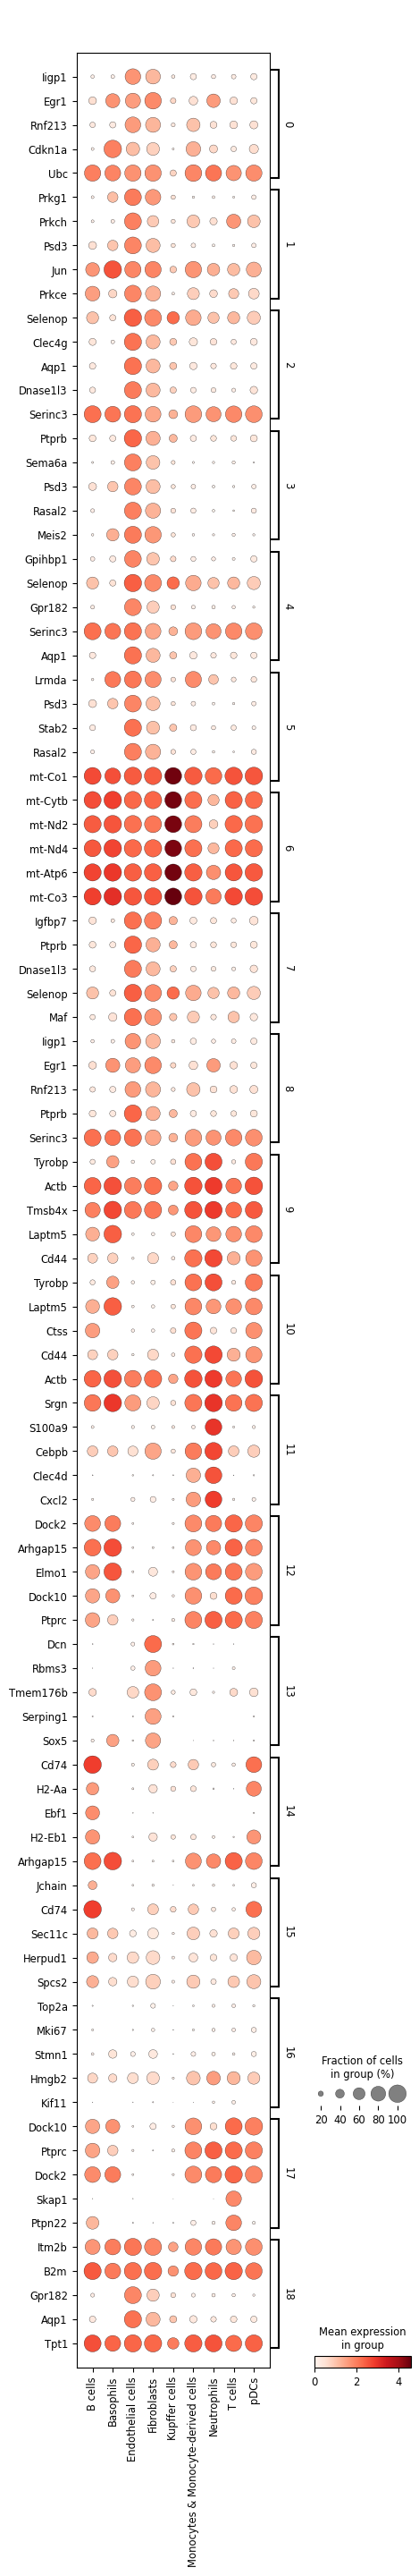

In [120]:
top_marker_genes = marker_genes.head(5)
sc.pl.dotplot(adata, var_names=top_marker_genes.to_dict('list'), groupby='treatment')
sc.pl.dotplot(adata, var_names=top_marker_genes.to_dict('list'), groupby='cell_type', swap_axes=True)

In [25]:
#pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 430.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 3.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
## Celltypist
import scipy.sparse as sp 
import celltypist
from celltypist import models

model_path = '/home/cbb575_jc4457/palmer_scratch/Healthy_Mouse_Liver.pkl'
model = models.Model.load(model=model_path)

In [29]:
model

CellTypist model with 17 cell types and 1988 features
    date: 2023-07-28 12:16:49.675179
    details: cell types from scRNA-seq and snRNA-seq of the healthy murine liver
    source: https://doi.org/10.1016/j.cell.2021.12.018
    version: v1
    cell types: B cells, Basophils, ..., pDCs
    features: Xkr4, Gm16041, ..., Grk5

In [30]:
model.cell_types

array(['B cells', 'Basophils', 'Cholangiocytes', 'Endothelial cells',
       'Fibroblasts', 'Hepatocytes', 'HsPCs', 'ILC1s', 'Kupffer cells',
       'Mig. cDCs', 'Monocytes & Monocyte-derived cells', 'NK cells',
       'Neutrophils', 'T cells', 'cDC1s', 'cDC2s', 'pDCs'], dtype=object)

In [31]:
# Calculate scaling factors to normalize each cell to 10,000 counts
total_counts_per_cell = np.array(adata.X.sum(axis=1)).flatten()
scaling_factors = 10000 / total_counts_per_cell

# Scale each cell by its scaling factor
adata.X = adata.X.multiply(scaling_factors[:, None]) if sp.issparse(adata.X) else adata.X * scaling_factors[:, None]

# Apply log1p transformation in-place
adata.X = np.log1p(adata.X)

adata.X.expm1().sum(axis = 1)

matrix([[10000.082 ],
        [ 9999.988 ],
        [10000.026 ],
        ...,
        [ 9999.7705],
        [10000.323 ],
        [10000.217 ]], dtype=float32)

In [32]:
import scipy
if isinstance(adata.X, (scipy.sparse.coo_matrix, scipy.sparse.csr_matrix, scipy.sparse.csc_matrix)):
    adata.X = adata.X.toarray()

In [33]:
predictions = celltypist.annotate(adata, model, majority_voting = True)

🔬 Input data has 11558 cells and 15517 genes
🔗 Matching reference genes in the model
🧬 1216 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [34]:
predictions.predicted_labels

predicted_labels over_clustering    majority_voting
AAACCCAAGATGACCG-1  Endothelial cells              57  Endothelial cells
AAACCCACACAGTCCG-1  Endothelial cells               1  Endothelial cells
AAACCCACACCCTTAC-1  Endothelial cells               7  Endothelial cells
AAACCCACACCTATCC-1  Endothelial cells              13  Endothelial cells
AAACCCACAGGCGTTC-1      Kupffer cells               4      Kupffer cells
...                               ...             ...                ...
TTTGTTGGTTACTCAG-1  Endothelial cells              88  Endothelial cells
TTTGTTGGTTCGGGTC-1  Endothelial cells              79  Endothelial cells
TTTGTTGTCAAAGCCT-1  Endothelial cells              28  Endothelial cells
TTTGTTGTCCGTTGAA-1  Endothelial cells              83  Endothelial cells
TTTGTTGTCTCCTACG-1      Kupffer cells               7  Endothelial cells

[11568 rows x 3 columns]

In [35]:
predictions.predicted_labels.index = predictions.predicted_labels.index.map(str)  # Ensure all indices are strings
predictions.predicted_labels = predictions.predicted_labels[~predictions.predicted_labels.index.duplicated(keep='first')]

In [36]:
adata = predictions.to_adata()

In [37]:
adata

AnnData object with n_obs × n_vars = 11558 × 15517
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'umap', 'leiden', 'treatment_colors', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'log1p', 'hvg'
    obsm: 'X_uce', 'X_umap'
    obsp: 'distances', 'connectivities'

In [38]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCACACAGTCCG-1    normal  T pos     1000                977   
AAACCCACACCCTTAC-1    normal  T pos      420                414   
AAACCCACACCTATCC-1    normal  T pos     1230               1206   
AAACCCACAGGCGTTC-1    normal  T pos      157                154   
AAACCCAGTGGCACTC-1    normal  T pos     1738               1703   
...                      ...    ...      ...                ...   
TTTGTTGCAGTAGGAC-1      nash  T pos     1365               1348   
TTTGTTGCATAGATCC-1      nash  T pos      942                919   
TTTGTTGGTTACTCAG-1      nash  T pos     3711               3629   
TTTGTTGTCAAAGCCT-1      nash  T pos     4689               4593   
TTTGTTGTCCGTTGAA-1      nash  T pos     5129               5026   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCACACAGTCCG-1                 6.885510        1680.0            7.427144   
AAACCCACACCCTTAC-1                 6.028279         993.0            6.901737   
AAACCCACACCTATCC-1                 7.095893        2292.0            7.737616   
AAACCCACAGGCGTTC-1                 5.043425         541.0            6.295266   
AAACCCAGTGGCACTC-1                 7.440734        3693.0            8.214465   
...                                     ...           ...                 ...   
TTTGTTGCAGTAGGAC-1                 7.207119        2420.0            7.791936   
TTTGTTGCATAGATCC-1                 6.824374        1344.0            7.204149   
TTTGTTGGTTACTCAG-1                 8.196988       11432.0            9.344259   
TTTGTTGTCAAAGCCT-1                 8.432506       17914.0            9.793394   
TTTGTTGTCCGTTGAA-1                 8.522579       19507.0            9.878580   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCACACAGTCCG-1                   23.869048                    34.166667   
AAACCCACACCCTTAC-1                   58.912387                    68.378651   
AAACCCACACCTATCC-1                   26.657941                    35.558464   
AAACCCACAGGCGTTC-1                   80.776340                    90.018484   
AAACCCAGTGGCACTC-1                   23.206066                    35.066342   
...                                        ...                          ...   
TTTGTTGCAGTAGGAC-1                   18.719008                    28.305785   
TTTGTTGCATAGATCC-1                   18.452381                    28.869048   
TTTGTTGGTTACTCAG-1                   15.115465                    23.819104   
TTTGTTGTCAAAGCCT-1                   13.252205                    20.855197   
TTTGTTGTCCGTTGAA-1                   13.220895                    20.428564   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCACACAGTCCG-1                    47.857143                    71.607143   
AAACCCACACCCTTAC-1                    78.449144                   100.000000   
AAACCCACACCTATCC-1                    47.643979                    69.197208   
AAACCCACAGGCGTTC-1                   100.000000                   100.000000   
AAACCCAGTGGCACTC-1                    46.953696                    65.475223   
...                                         ...                          ...   
TTTGTTGCAGTAGGAC-1                    42.148760                    64.958678   
TTTGTTGCATAGATCC-1                    43.750000                    68.824405   
TTTGTTGGTTACTCAG-1                    35.671798                    53.621414   
TTTGTTGTCAAAGCCT-1                    31.528414                    49.179413   
TTTGTTGTCCGTTGAA-1                    29.625263                    46.321833   

                   leiden                    predicted_labels over_clustering  \
AAACCCACACAGTCCG-1      5                   Endothelial cells               1   
AAACCCACACCCTTAC-1      6                   Endothelial cells               7   
AAACCCACACCTATCC-1      5                   Endothelial cells              13   
AAACCCA

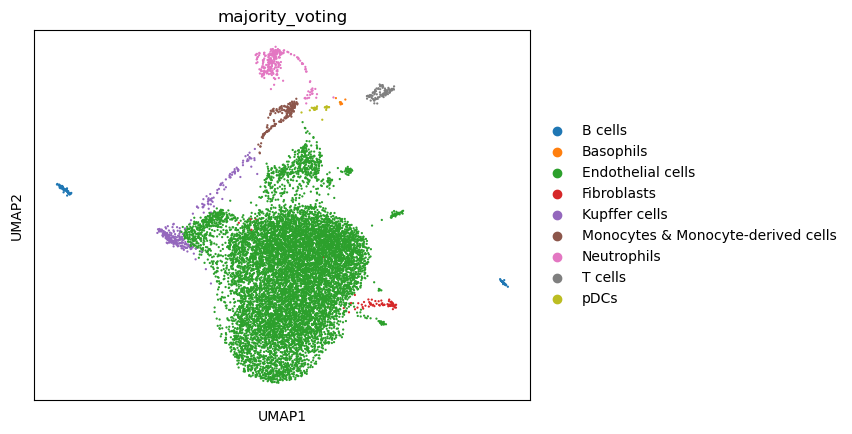

In [41]:
#sc.pl.umap(adata, color=['leiden'], show=True)
sc.pl.umap(adata, color=['majority_voting'], show=True)
#sc.pl.umap(adata, color=['cell_type'], legend_loc='on data', frameon=False)

In [115]:
unique_pairs = adata.obs[['leiden', 'majority_voting', 'conf_score']].drop_duplicates()
unique_pairs = unique_pairs.sort_values(by='leiden', ascending=True)

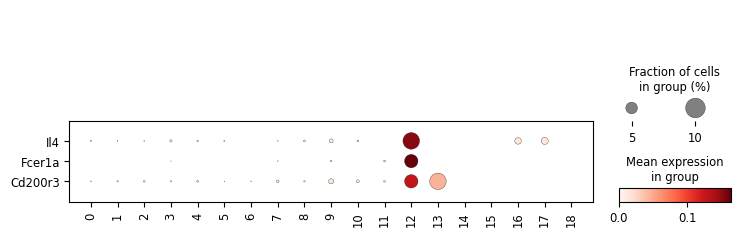

In [113]:
#genes = ['Col1a1', 'Col1a2', 'Pdgfra', 'Fn1', 'Acta2', 'Thy1', 'Fap'] #fibroblasts
#genes = ['Pecam1', 'Cdh5', 'Vwf', 'Flt1', 'Kdr', 'Nos3', 'Esm1'] #endothelial
#genes = ['Flt1', 'Kdr', 'Cd68', 'Fcgr1'] # compare endo vs kupffer
#genes = ['Clec4f', 'Timd4', 'Marco','Fcgr1', 'Cd68'] #kupffer
#genes = ['Ccr2', 'Ly6c2', 'Cd14', 'Fcgr3', 'Ccr2', 'Cd68', 'Cd86', 'Fcgr1', 'Itgax', 'H2-Ab1', 'Cd86', 'Ccr7'] #monocyte and derived
#genes = ['S100a8', 'S100a9', 'Lcn2', 'Elane', 'Mpo'] #neutrophils
#genes = ['Siglech', 'Bst2', 'Tcf4', 'Il3ra'] #pDC
#genes = ['Cd3e', 'Cd3d', 'Cd4', 'Cd8a', 'Foxp3', 'Il2ra']#tcell
genes = ['Il4', 'Fcer1a', 'Cd200r3'] #basophil



#'Ptprc', 'Cd19', 'Cd22',
dotplot = sc.pl.dotplot(adata, var_names=genes, groupby=['leiden'], swap_axes=True)

In [114]:
leiden_pairs = unique_pairs[unique_pairs['leiden'] == '12']

# For each unique 'leiden' and 'majority_voting' pair, get the row with the highest 'conf_score'
highest_conf_pairs = (
    leiden_pairs.sort_values('conf_score', ascending=False)
    .drop_duplicates(subset=['leiden', 'majority_voting'])
)

highest_conf_pairs

leiden majority_voting  conf_score
CACTGAATCTGACCCT-1     12         T cells    1.000000
GTTTACTAGCGCCATC-1     12       Basophils    0.999265
TCCTCCCCAAAGGTTA-1     12     Neutrophils    0.576769
GGCTGTGAGCTACGTT-1     12            pDCs    0.049926

In [116]:
adata.obs['cell_type']= adata.obs['majority_voting']

In [117]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCACACAGTCCG-1    normal  T pos     1000                977   
AAACCCACACCCTTAC-1    normal  T pos      420                414   
AAACCCACACCTATCC-1    normal  T pos     1230               1206   
AAACCCACAGGCGTTC-1    normal  T pos      157                154   
AAACCCAGTGGCACTC-1    normal  T pos     1738               1703   
...                      ...    ...      ...                ...   
TTTGTTGCAGTAGGAC-1      nash  T pos     1365               1348   
TTTGTTGCATAGATCC-1      nash  T pos      942                919   
TTTGTTGGTTACTCAG-1      nash  T pos     3711               3629   
TTTGTTGTCAAAGCCT-1      nash  T pos     4689               4593   
TTTGTTGTCCGTTGAA-1      nash  T pos     5129               5026   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCACACAGTCCG-1                 6.885510        1680.0            7.427144   
AAACCCACACCCTTAC-1                 6.028279         993.0            6.901737   
AAACCCACACCTATCC-1                 7.095893        2292.0            7.737616   
AAACCCACAGGCGTTC-1                 5.043425         541.0            6.295266   
AAACCCAGTGGCACTC-1                 7.440734        3693.0            8.214465   
...                                     ...           ...                 ...   
TTTGTTGCAGTAGGAC-1                 7.207119        2420.0            7.791936   
TTTGTTGCATAGATCC-1                 6.824374        1344.0            7.204149   
TTTGTTGGTTACTCAG-1                 8.196988       11432.0            9.344259   
TTTGTTGTCAAAGCCT-1                 8.432506       17914.0            9.793394   
TTTGTTGTCCGTTGAA-1                 8.522579       19507.0            9.878580   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCACACAGTCCG-1                   23.869048                    34.166667   
AAACCCACACCCTTAC-1                   58.912387                    68.378651   
AAACCCACACCTATCC-1                   26.657941                    35.558464   
AAACCCACAGGCGTTC-1                   80.776340                    90.018484   
AAACCCAGTGGCACTC-1                   23.206066                    35.066342   
...                                        ...                          ...   
TTTGTTGCAGTAGGAC-1                   18.719008                    28.305785   
TTTGTTGCATAGATCC-1                   18.452381                    28.869048   
TTTGTTGGTTACTCAG-1                   15.115465                    23.819104   
TTTGTTGTCAAAGCCT-1                   13.252205                    20.855197   
TTTGTTGTCCGTTGAA-1                   13.220895                    20.428564   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCACACAGTCCG-1                    47.857143                    71.607143   
AAACCCACACCCTTAC-1                    78.449144                   100.000000   
AAACCCACACCTATCC-1                    47.643979                    69.197208   
AAACCCACAGGCGTTC-1                   100.000000                   100.000000   
AAACCCAGTGGCACTC-1                    46.953696                    65.475223   
...                                         ...                          ...   
TTTGTTGCAGTAGGAC-1                    42.148760                    64.958678   
TTTGTTGCATAGATCC-1                    43.750000                    68.824405   
TTTGTTGGTTACTCAG-1                    35.671798                    53.621414   
TTTGTTGTCAAAGCCT-1                    31.528414                    49.179413   
TTTGTTGTCCGTTGAA-1                    29.625263                    46.321833   

                   leiden                    predicted_labels over_clustering  \
AAACCCACACAGTCCG-1      5                   Endothelial cells               1   
AAACCCACACCCTTAC-1      6                   Endothelial cells               7   
AAACCCACACCTATCC-1      5                   Endothelial cells              13   
AAACCCA

In [103]:
cluster = {
    '0' : 'Endothelial cells',
    '1' : 'Endothelial cells',
    '2' : 'Endothelial cells',
    '3' : 'Endothelial cells',
    '4' : 'Endothelial cells',
    '5' : 'Endothelial cells',
    '6' : 'Endothelial cells',
    '7' : 'Endothelial cells',
    '8' : 'Endothelial cells',
    '9' : 'Kupffer cells',
    '10' : 'Monocytes & Monocyte-derived cells',
    '11' : 'Neutrophils',
    '12' : 'Basophils',
    '13' : 'Fibroblasts',
    '14' : 'B cells',
    '15' : 'B cells',
    '16' : 'Endothelial cells',
    '17' : 'Endothelial cells',
    '18' : 'Endothelial cells', 
}

adata.obs['leiden'] = adata.obs['leiden'].astype(str)
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster)

In [104]:
adata.obs

treatment sample  n_genes  n_genes_by_counts  \
AAACCCACACAGTCCG-1    normal  T pos     1000                977   
AAACCCACACCCTTAC-1    normal  T pos      420                414   
AAACCCACACCTATCC-1    normal  T pos     1230               1206   
AAACCCACAGGCGTTC-1    normal  T pos      157                154   
AAACCCAGTGGCACTC-1    normal  T pos     1738               1703   
...                      ...    ...      ...                ...   
TTTGTTGCAGTAGGAC-1      nash  T pos     1365               1348   
TTTGTTGCATAGATCC-1      nash  T pos      942                919   
TTTGTTGGTTACTCAG-1      nash  T pos     3711               3629   
TTTGTTGTCAAAGCCT-1      nash  T pos     4689               4593   
TTTGTTGTCCGTTGAA-1      nash  T pos     5129               5026   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCACACAGTCCG-1                 6.885510        1680.0            7.427144   
AAACCCACACCCTTAC-1                 6.028279         993.0            6.901737   
AAACCCACACCTATCC-1                 7.095893        2292.0            7.737616   
AAACCCACAGGCGTTC-1                 5.043425         541.0            6.295266   
AAACCCAGTGGCACTC-1                 7.440734        3693.0            8.214465   
...                                     ...           ...                 ...   
TTTGTTGCAGTAGGAC-1                 7.207119        2420.0            7.791936   
TTTGTTGCATAGATCC-1                 6.824374        1344.0            7.204149   
TTTGTTGGTTACTCAG-1                 8.196988       11432.0            9.344259   
TTTGTTGTCAAAGCCT-1                 8.432506       17914.0            9.793394   
TTTGTTGTCCGTTGAA-1                 8.522579       19507.0            9.878580   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCACACAGTCCG-1                   23.869048                    34.166667   
AAACCCACACCCTTAC-1                   58.912387                    68.378651   
AAACCCACACCTATCC-1                   26.657941                    35.558464   
AAACCCACAGGCGTTC-1                   80.776340                    90.018484   
AAACCCAGTGGCACTC-1                   23.206066                    35.066342   
...                                        ...                          ...   
TTTGTTGCAGTAGGAC-1                   18.719008                    28.305785   
TTTGTTGCATAGATCC-1                   18.452381                    28.869048   
TTTGTTGGTTACTCAG-1                   15.115465                    23.819104   
TTTGTTGTCAAAGCCT-1                   13.252205                    20.855197   
TTTGTTGTCCGTTGAA-1                   13.220895                    20.428564   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCACACAGTCCG-1                    47.857143                    71.607143   
AAACCCACACCCTTAC-1                    78.449144                   100.000000   
AAACCCACACCTATCC-1                    47.643979                    69.197208   
AAACCCACAGGCGTTC-1                   100.000000                   100.000000   
AAACCCAGTGGCACTC-1                    46.953696                    65.475223   
...                                         ...                          ...   
TTTGTTGCAGTAGGAC-1                    42.148760                    64.958678   
TTTGTTGCATAGATCC-1                    43.750000                    68.824405   
TTTGTTGGTTACTCAG-1                    35.671798                    53.621414   
TTTGTTGTCAAAGCCT-1                    31.528414                    49.179413   
TTTGTTGTCCGTTGAA-1                    29.625263                    46.321833   

                   leiden                    predicted_labels over_clustering  \
AAACCCACACAGTCCG-1      5                   Endothelial cells               1   
AAACCCACACCCTTAC-1      6                   Endothelial cells               7   
AAACCCACACCTATCC-1      5                   Endothelial cells              13   
AAACCCA

... storing 'leiden' as categorical
... storing 'cell_type' as categorical


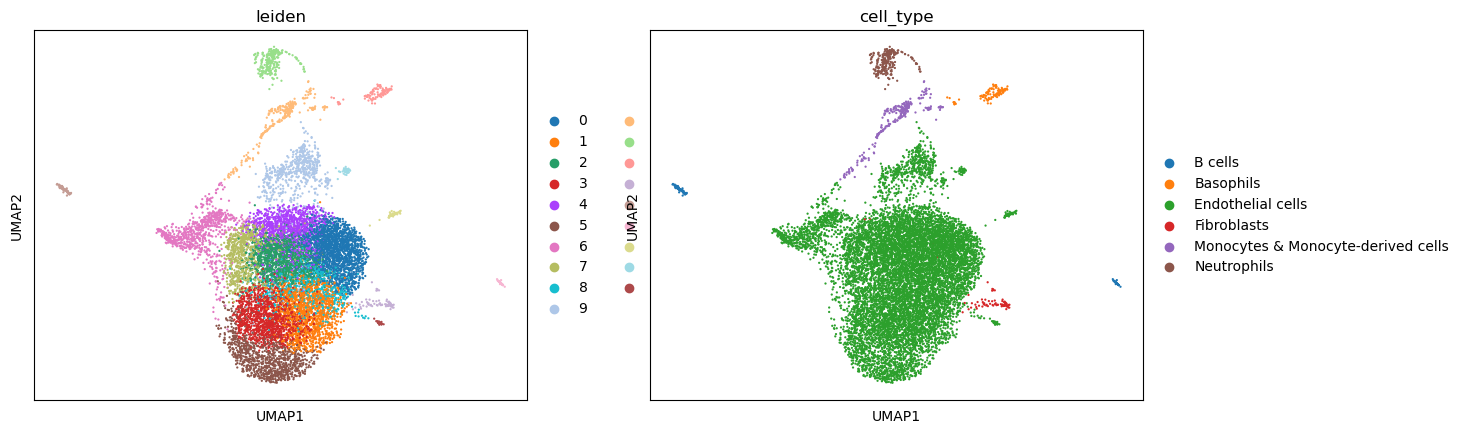

In [105]:
sc.pl.umap(adata, color=['leiden', 'cell_type'], show=True)

In [121]:
adata.write('tom_jointly_clustered_adata.h5ad', compression='gzip')

## Compositional analysis

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
import warnings

#from sccoda.util import cell_composition_data as dat
#from sccoda.util import data_visualization as viz

#import sccoda.datasets as scd

warnings.filterwarnings("ignore")

In [125]:
adata

AnnData object with n_obs × n_vars = 11558 × 15517
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'umap', 'leiden', 'treatment_colors', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'log1p', 'hvg', 'predicted_labels_colors', 'majority_voting_colors', 'cell_type_colors'
    obsm: 'X_uce', 'X_umap'
    obsp: 'distances', 'connectivities'

In [126]:
adata.obs['sample']

AAACCCACACAGTCCG-1    T pos
AAACCCACACCCTTAC-1    T pos
AAACCCACACCTATCC-1    T pos
AAACCCACAGGCGTTC-1    T pos
AAACCCAGTGGCACTC-1    T pos
                      ...  
TTTGTTGCAGTAGGAC-1    T pos
TTTGTTGCATAGATCC-1    T pos
TTTGTTGGTTACTCAG-1    T pos
TTTGTTGTCAAAGCCT-1    T pos
TTTGTTGTCCGTTGAA-1    T pos
Name: sample, Length: 11558, dtype: category
Categories (1, object): ['T pos']

In [128]:
adata.obs['treatment']

AAACCCACACAGTCCG-1    normal
AAACCCACACCCTTAC-1    normal
AAACCCACACCTATCC-1    normal
AAACCCACAGGCGTTC-1    normal
AAACCCAGTGGCACTC-1    normal
                       ...  
TTTGTTGCAGTAGGAC-1      nash
TTTGTTGCATAGATCC-1      nash
TTTGTTGGTTACTCAG-1      nash
TTTGTTGTCAAAGCCT-1      nash
TTTGTTGTCCGTTGAA-1      nash
Name: treatment, Length: 11558, dtype: category
Categories (2, object): ['nash', 'normal']

In [129]:
num_tot_cells = adata.obs.groupby(['treatment']).size()  # Size gives the total count for each group
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.values))
num_tot_cells

{'nash': 6438, 'normal': 5120}

In [131]:
cell_type_counts = adata.obs.groupby(['treatment','sample','cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis=1)>0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

treatment sample                           cell_type  n_genes
0       nash  T pos                             B cells       91
1       nash  T pos                           Basophils        6
2       nash  T pos                   Endothelial cells     5744
3       nash  T pos                         Fibroblasts       42
4       nash  T pos                       Kupffer cells       56
5       nash  T pos  Monocytes & Monocyte-derived cells      165
6       nash  T pos                         Neutrophils      230
7       nash  T pos                             T cells       79
8       nash  T pos                                pDCs       25
9     normal  T pos                             B cells       23
10    normal  T pos                           Basophils        2
11    normal  T pos                   Endothelial cells     4779
12    normal  T pos                         Fibroblasts       32
13    normal  T pos                       Kupffer cells      224
14    normal  T pos  Monocytes & Monocyte-derived cells       11
15    normal  T pos                         Neutrophils       32
16    normal  T pos                             T cells       11
17    normal  T pos                                pDCs        6

In [133]:
cell_type_counts['total_cells']= cell_type_counts.treatment.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.n_genes/cell_type_counts.total_cells
cell_type_counts

treatment sample                           cell_type  n_genes  total_cells  \
0       nash  T pos                             B cells       91         6438   
1       nash  T pos                           Basophils        6         6438   
2       nash  T pos                   Endothelial cells     5744         6438   
3       nash  T pos                         Fibroblasts       42         6438   
4       nash  T pos                       Kupffer cells       56         6438   
5       nash  T pos  Monocytes & Monocyte-derived cells      165         6438   
6       nash  T pos                         Neutrophils      230         6438   
7       nash  T pos                             T cells       79         6438   
8       nash  T pos                                pDCs       25         6438   
9     normal  T pos                             B cells       23         5120   
10    normal  T pos                           Basophils        2         5120   
11    normal  T pos                   Endothelial cells     4779         5120   
12    normal  T pos                         Fibroblasts       32         5120   
13    normal  T pos                       Kupffer cells      224         5120   
14    normal  T pos  Monocytes & Monocyte-derived cells       11         5120   
15    normal  T pos                         Neutrophils       32         5120   
16    normal  T pos                             T cells       11         5120   
17    normal  T pos                                pDCs        6         5120   

    frequency  
0    0.014135  
1    0.000932  
2    0.892203  
3    0.006524  
4    0.008698  
5    0.025629  
6    0.035725  
7    0.012271  
8    0.003883  
9    0.004492  
10   0.000391  
11   0.933398  
12   0.006250  
13   0.043750  
14   0.002148  
15   0.006250  
16   0.002148  
17   0.001172

<function matplotlib.pyplot.show(close=None, block=None)>

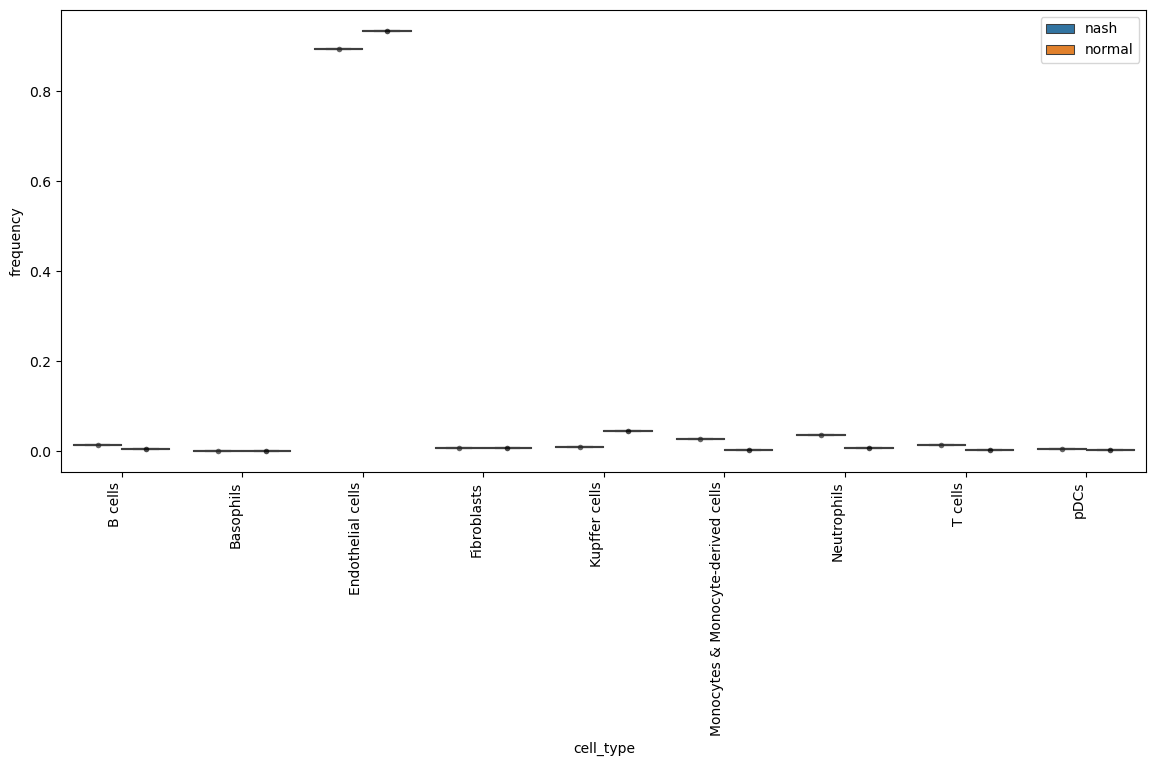

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=cell_type_counts, x='cell_type', y='frequency', hue='treatment')
sns.stripplot(data=cell_type_counts, x='cell_type', y='frequency', hue='treatment',
              dodge=True, color='black', size=4, alpha=0.7, jitter=True)

plt.xticks(rotation=90, ha='right')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:len(set(labels))], labels[:len(set(labels))])

plt.show

# take points from same compartment lp and m and and color them the same

In [135]:
cluster_changes = cell_type_counts.groupby(['treatment', 'cell_type'])['frequency'].mean().unstack('treatment')

# fold changes or differences
cluster_changes['change'] = cluster_changes.iloc[:, 1] - cluster_changes.iloc[:, 0]  # Adjust columns for your conditions
cluster_changes = cluster_changes.sort_values('change', ascending=False)

print(cluster_changes)

treatment                               nash    normal    change
cell_type                                                       
Endothelial cells                   0.892203  0.933398  0.041196
Kupffer cells                       0.008698  0.043750  0.035052
Fibroblasts                         0.006524  0.006250 -0.000274
Basophils                           0.000932  0.000391 -0.000541
pDCs                                0.003883  0.001172 -0.002711
B cells                             0.014135  0.004492 -0.009643
T cells                             0.012271  0.002148 -0.010122
Monocytes & Monocyte-derived cells  0.025629  0.002148 -0.023481
Neutrophils                         0.035725  0.006250 -0.029475


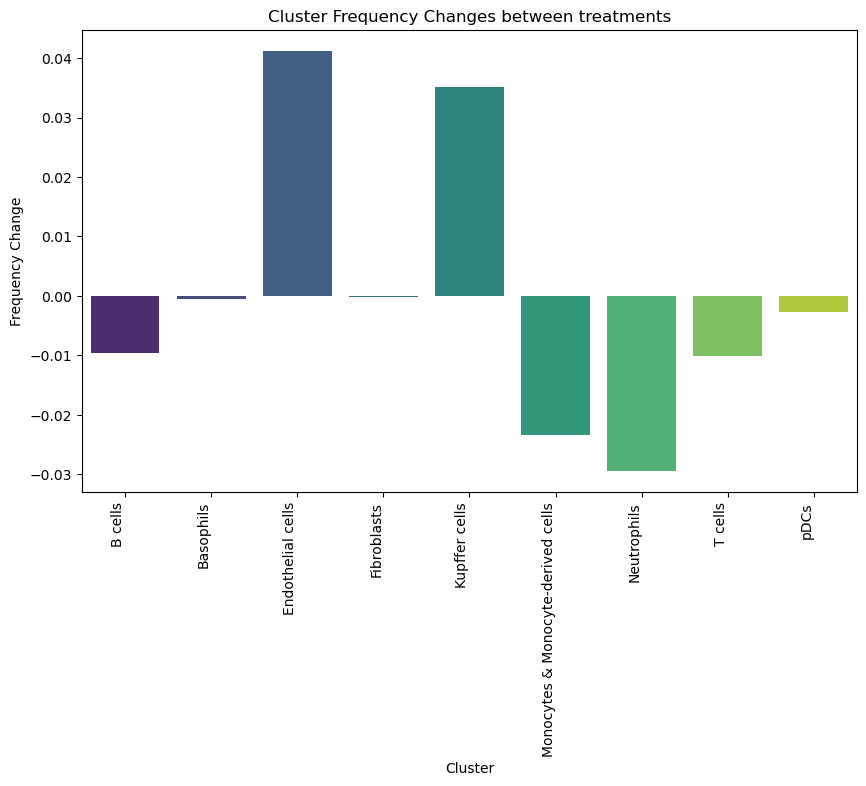

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_changes.reset_index(), x='cell_type', y='change', palette="viridis")
plt.xticks(rotation=90, ha='right')
plt.title("Cluster Frequency Changes between treatments")
plt.ylabel("Frequency Change")
plt.xlabel("Cluster")
plt.show()

In [137]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', key_added = "wilcoxon")

         Falling back to preprocessing with `sc.pp.pca` and default params.


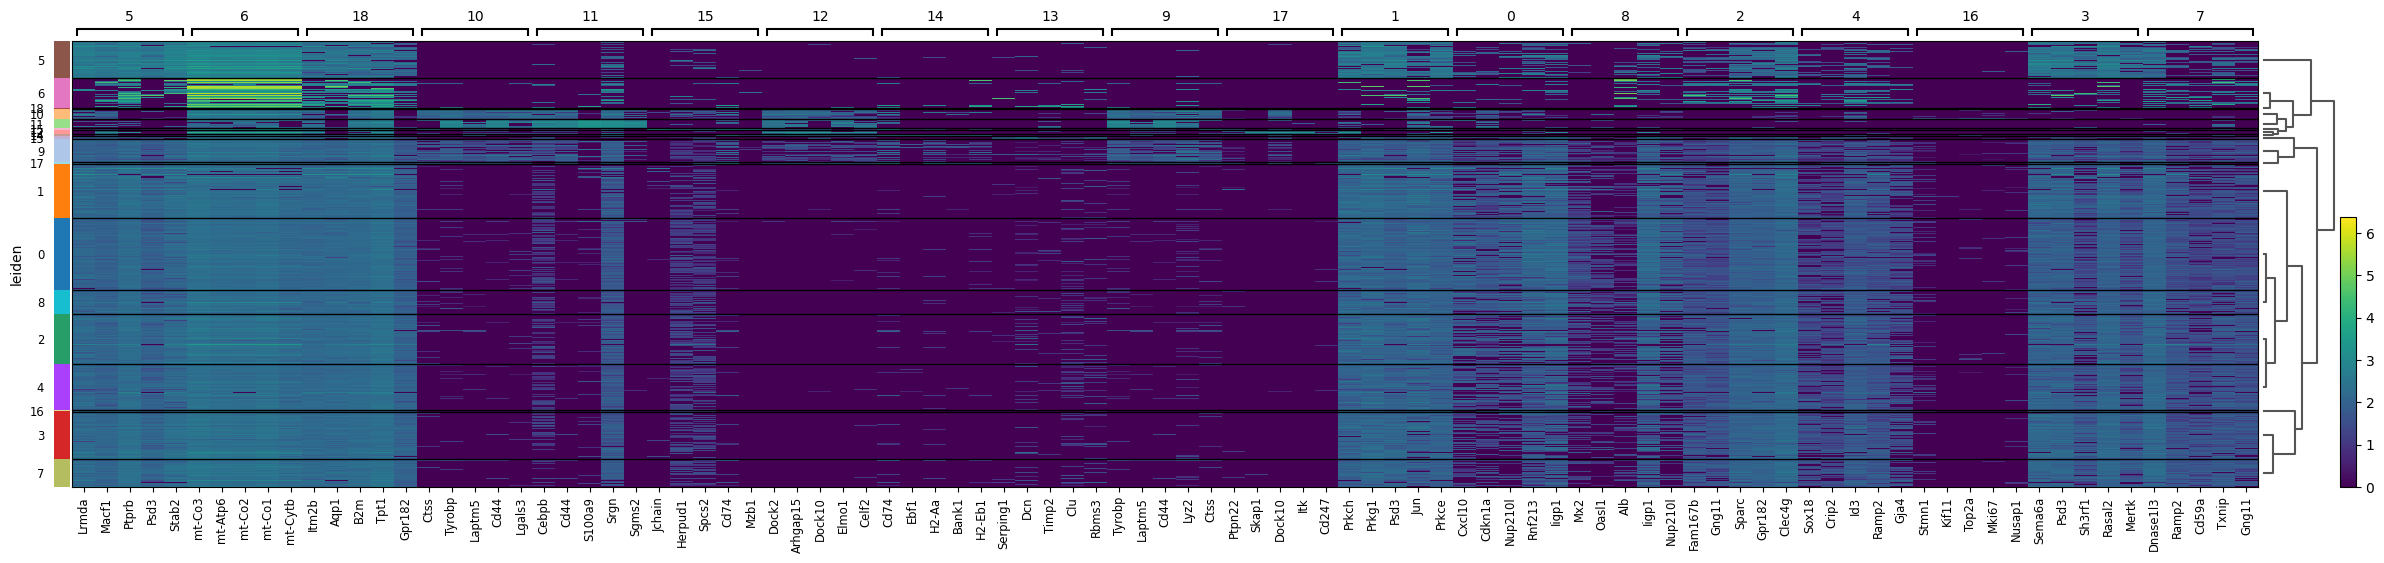

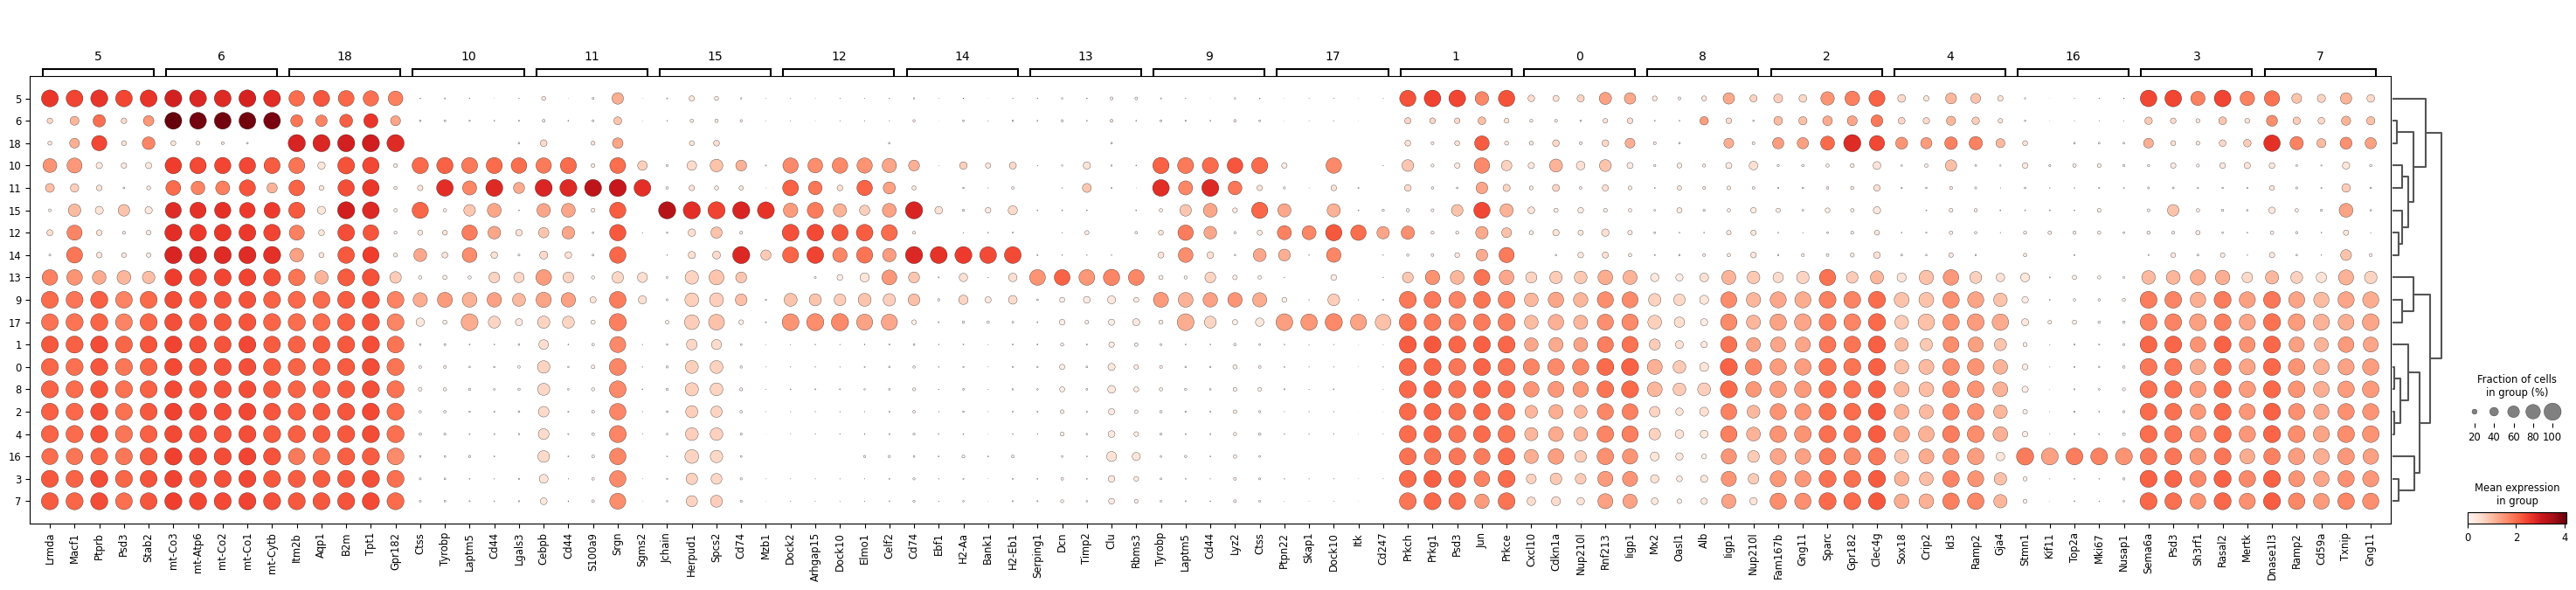

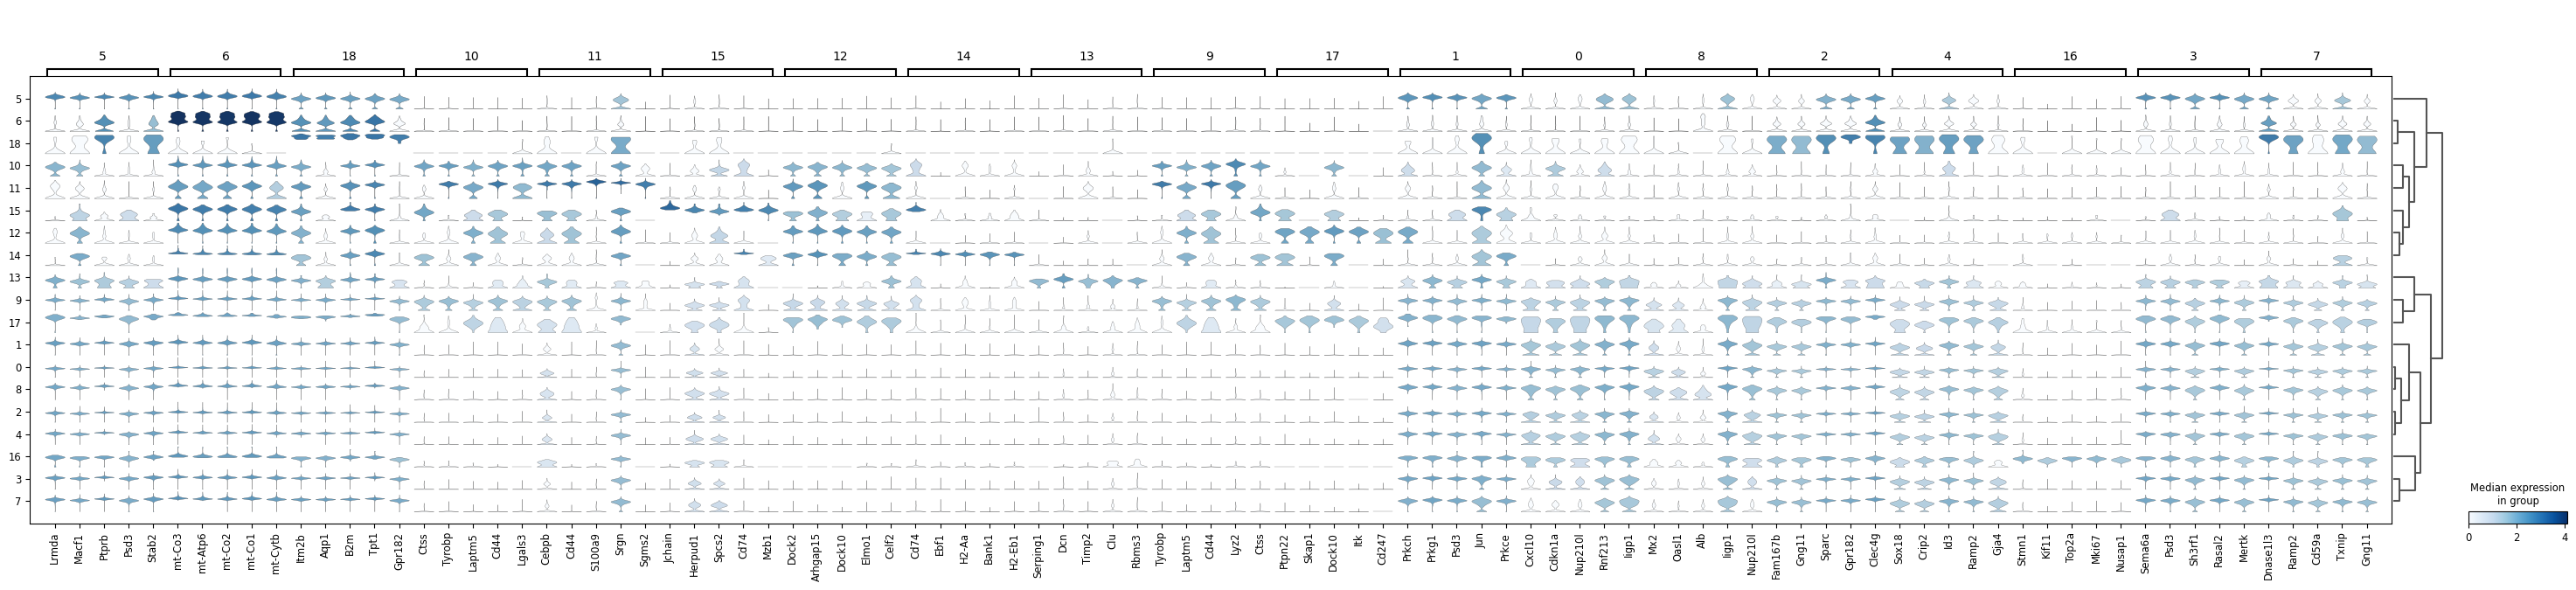

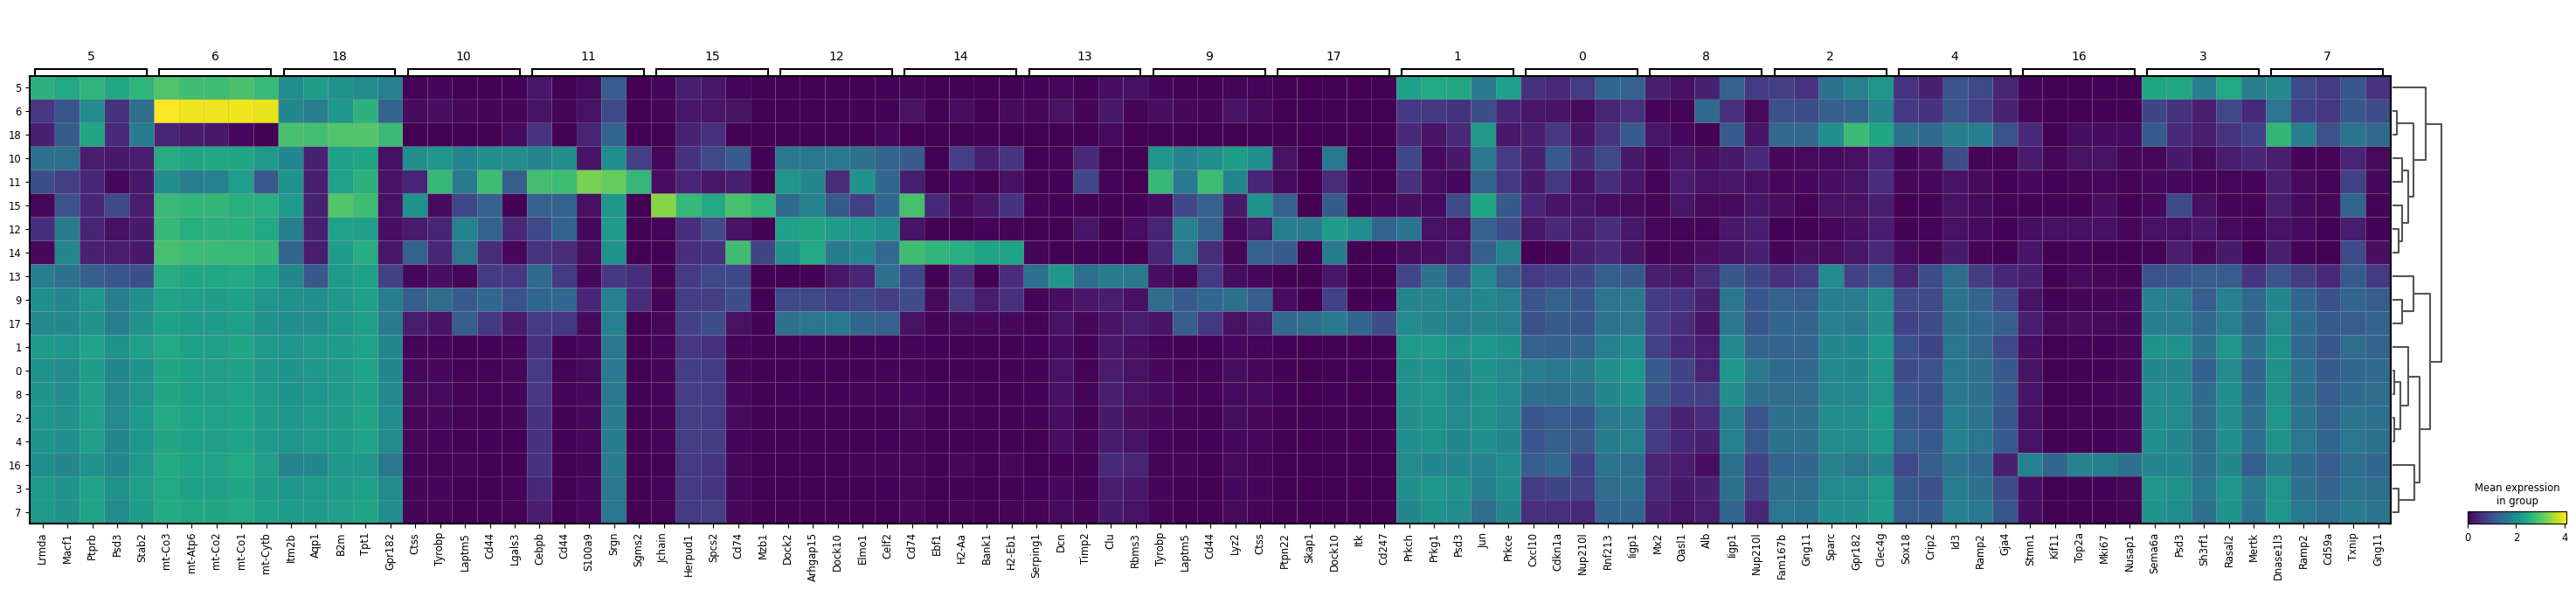

In [138]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="leiden", show_gene_labels=True)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="leiden")
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")

categories: B cells, Basophils, Endothelial cells, etc.
var_group_labels: 0, 1, 2, etc.


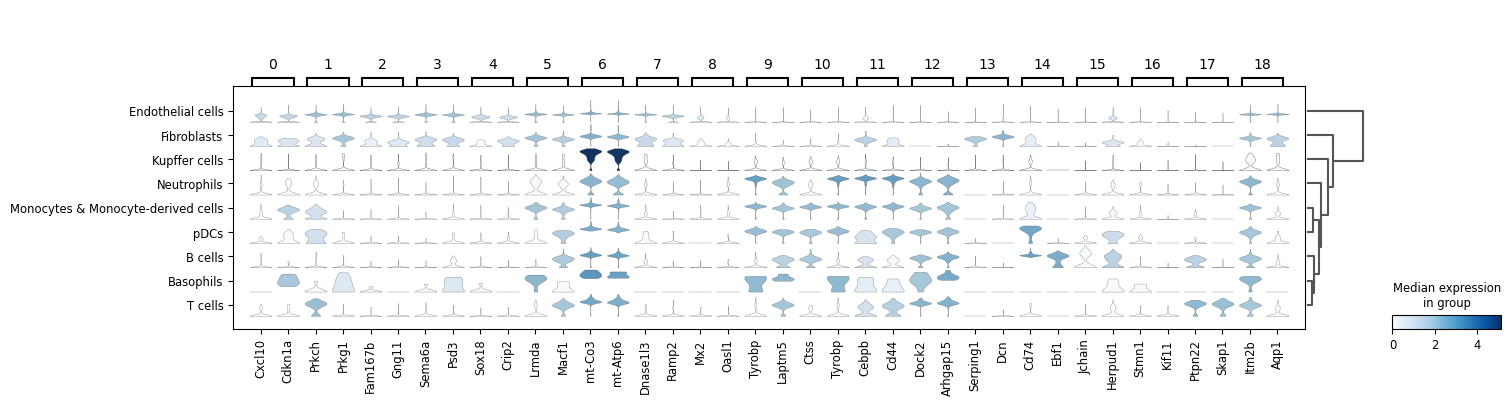

In [139]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=2, key="wilcoxon", groupby="cell_type")

## Convert to Seurat

In [18]:
import anndata as ad

PATH = "/home/cbb575_jc4457/palmer_scratch"

# Load the .h5ad file
adata = ad.read('tom_uce_adata.h5ad')

In [19]:
adata

AnnData object with n_obs × n_vars = 11558 × 15517
    obs: 'treatment', 'sample', 'n_genes'
    var: 'n_cells'
    obsm: 'X_uce'

In [20]:
#raw counts from file before processing

adata.layers['counts'] = adata.X.copy()
io.mmwrite(os.path.join(PATH, 'counts.mtx'), adata.layers['counts'])

In [6]:
#from file after cell type annotations
adata = ad.read('tom_jointly_clusterd_adata.h5ad')
from scipy import io
import os

In [9]:
cell_meta = adata.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = adata.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = adata.obsm['X_umap'][:,1]
gene_meta = adata.var.copy()
gene_meta['GeneName'] = gene_meta.index

In [10]:
cell_meta.to_csv(os.path.join(PATH, 'counts_cellMeta.csv'), index=None)
gene_meta.to_csv(os.path.join(PATH, 'counts_geneMeta.csv'), index=None)

## Gene Set Analysis

In [140]:
#pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.0/549.0 kB 9.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [141]:
import gseapy

In [142]:
gene_set_names = gseapy.get_library_name(organism='Mouse')

In [143]:
adata

AnnData object with n_obs × n_vars = 11558 × 15517
    obs: 'treatment', 'sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'cell_type'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'umap', 'leiden', 'treatment_colors', 'sample_colors', 'leiden_colors', 'rank_genes_groups', 'log1p', 'hvg', 'predicted_labels_colors', 'majority_voting_colors', 'cell_type_colors', 'wilcoxon', 'dendrogram_leiden', 'dendrogram_cell_type'
    obsm: 'X_uce', 'X_umap', 'X_pca'
    obsp: 'distances', 'connectivities'

In [144]:
#?gseapy.enrichr
glist = sc.get.rank_genes_groups_df(adata, group='treatment', key='wilcoxon', log2fc_min=0.25, pval_cutoff=0.05)['names'].squeeze().str.strip().tolist()
print(len(glist))

KeyError: "None of [Index(['treatment'], dtype='object')] are in the [columns]"

## DE

In [4]:
adata = ad.read('tom_jointly_clustered_adata.h5ad')

/home/cbb575_jc4457/.conda/envs/CellBender/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
subset = adata[adata.obs['cell_type'].isin(['Endothelial cells','Kupffer cells'])].copy()

/home/cbb575_jc4457/.conda/envs/CellBender/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
import scvi

Global seed set to 0


In [166]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO     No batch_key inputted, assuming all cells are same batch                                                  


No batch_key inputted, assuming all cells are same batch


INFO     No label_key inputted, assuming all cells have same label                                                 


No label_key inputted, assuming all cells have same label


INFO     Using data from adata.X                                                                                   


Using data from adata.X


INFO     Successfully registered anndata object containing 11558 cells, 15517 vars, 1 batches, 1 labels, and 0     
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               


Successfully registered anndata object containing 11558 cells, 15517 vars, 1 batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                                                


Please do not further modify adata until model is trained.
Created a temporary directory at /tmp/tmpfbbz3nj6
Writing /tmp/tmpfbbz3nj6/_remote_module_non_scriptable.py
/home/cbb575_jc4457/.conda/envs/CellBender/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:148: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  f"Setting `Trainer(checkpoint_callback={checkpoint_callback})` is deprecated in v1.5 and will "
/home/cbb575_jc4457/.conda/envs/CellBender/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=1)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to dis

Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

TypeError: on_train_epoch_end() got an unexpected keyword argument 'unused'